In [204]:
### This is my working for the python assignment

######################## Python Translate Script ########################

## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
## IMPORTANT: install BioPython so that this will work

In [205]:
import os

os.chdir(".") #set current working directory 

#os.getcwd()
os.listdir() #list files in the current directory

['.ipynb_checkpoints',
 'bears_cytb.fasta',
 'bears_mass.csv',
 'myREADME',
 'my_script.ipynb',
 'new_bears_df.csv',
 'README.md',
 'seqence_translate.py']

In [206]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable
import pandas as pd

#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

## 1 ##
## Dr. X: this gets sequences 
## Please finish documenting this function with comments, or in notebook markdown text
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.
def get_sequences_from_file(fasta_fn): #extracts relevant information from a sequence file
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict) #returns a dictonary with key as species and value as sequence

In [207]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names

def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#    for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
        # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
        # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
    aa_seq_string = []
    for nucleotide in range(0, len(string_nucleotides),3):
        codon = string_nucleotides[nucleotide:nucleotide +3]
        
        if codon == 'TGA' or codon == 'TAA' or codon == 'TAG': #checks for stop codons
            break #stops once it encounters stop codons # I used conventional stop codons TAA, TGA, TAG
        else:
            aa = mito_table.forward_table[codon] #extacts the amino acid from table
            aa_seq_string.append(aa) #add the aa to aa_seq_string       
       
    return "".join(aa_seq_string) #returns a string of sequence


In [222]:
#See what the table returns
#The table is misleading on the stop codon AGA, AGG (Argininge), TGA (W) should be a stop
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [209]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

def translate(string_nucleotides):
    protein = string_nucleotides.translate(to_stop=True)
    return str(protein) #returns a string object instead of Seq output from biopython translate


In [210]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
#def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

       
def compute_molecular_weight(aa_seq):
    molecular_w = ProteinAnalysis(aa_seq).molecular_weight()
    return molecular_w
    
    

In [211]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

def GC_content(dna_seq):
    count = 0
    for base in dna_seq:
        if base == 'G' or base=='C':
            count+=1
    prop = count/len(dna_seq)*100
    
    return prop

In [212]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

#Read in files
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

## 6 ## 
## Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

new_bears_df = bears_df.assign(molecular_weight = 'NaN', GC_content='NaN')
new_bears_df2 = bears_df.assign(molecular_weight = 'NaN', GC_content='NaN')


In [213]:
new_bears_df

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


In [214]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

for key, value in cytb_seqs.items():
    aa_seq = translate_function(value)
    molecular_weight = compute_molecular_weight(aa_seq)
    GC_prop = GC_content(value)
    
    for index, row in new_bears_df.iterrows():
        if row['species'] == key:
            new_bears_df.loc[index, 'molecular_weight']=molecular_weight
            new_bears_df.loc[index, 'GC_content'] = GC_prop
    


In [215]:
new_bears_df

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,3207.7,43.7719
1,Ursus arctos,203.500,3173.68,43.7719
2,Ursus thibetanus,99.714,3143.66,45.614
3,Melursus ursinus,100.030,3143.66,45.1754
4,Ursus americanus,110.560,3173.68,43.9474
5,Helarctos malayanus,47.020,3143.66,44.2982
6,Ailuropoda melanoleuca,118.200,3277.83,40.7895
7,Tremarctos ornatus,140.700,3180.68,44.386
8,Ursus maritimus,425.100,3207.7,44.2982


In [216]:
for key, value in cytb_seqs.items():
    aa_seq = translate(value) #Used the translate option to counter check the results
    GC_prop = GC_content(value)
    molecular_weight = compute_molecular_weight(str(aa_seq))
    
    
    for index, row in new_bears_df.iterrows():
        if row['species'] == key:
            new_bears_df2.loc[index, 'molecular_weight']=molecular_weight
            new_bears_df2.loc[index, 'GC_content'] = GC_prop

In [217]:
new_bears_df2

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,3207.7,43.7719
1,Ursus arctos,203.500,3173.68,43.7719
2,Ursus thibetanus,99.714,3143.66,45.614
3,Melursus ursinus,100.030,3143.66,45.1754
4,Ursus americanus,110.560,3173.68,43.9474
5,Helarctos malayanus,47.020,3143.66,44.2982
6,Ailuropoda melanoleuca,118.200,3277.83,40.7895
7,Tremarctos ornatus,140.700,3180.68,44.386
8,Ursus maritimus,425.100,3207.7,44.2982


Text(0.5, 1.0, 'Mass per Species')

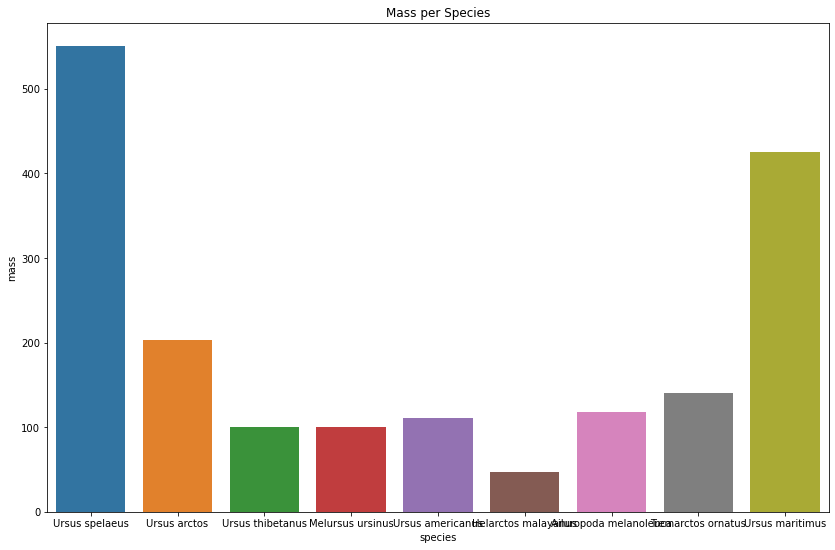

In [218]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the largest bear species? 
## *Q2* What else is interesting about this species?
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plot_dims = (14, 9)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(data=new_bears_df, x='species', y='mass').set_title("Mass per Species")

## *Q1* Ursus spelaeus
## *Q2* (2X - 10x)times heavier than most other bear species except Ursus maritimus


Text(0.5, 1.0, 'Molecular weight vs GC content')

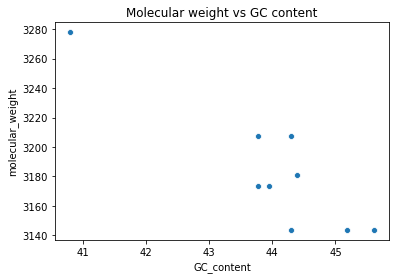

In [219]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

sns.scatterplot(data=new_bears_df, x='GC_content', y='molecular_weight').set_title("Molecular weight vs GC content")
#The more GC content the less the molecular_weight
#I thought its 

In [220]:
## 10 ##
## Save the new DataFrame to a file called "bears_mass_cytb.csv"


x =pd.DataFrame(new_bears_df)
x.to_csv('new_bears_df.csv', index=False)
#os.listdir()

#xx = pd.read_csv('new_bear.csv')
#xx

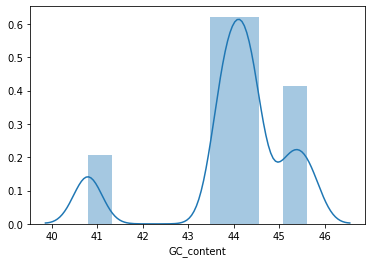

In [221]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)

sns.distplot(new_bears_df['GC_content'])